## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4            Y
0  83.636810  1264.986159  0.653237  6.116288   830.306548
1  22.103632  1687.351000  0.671337  6.562953  1133.047938
2   7.993291   169.466746  0.022920  6.569232     8.854550
3  63.485023  1448.092582  0.163424  1.926118   245.105140
4  51.776330  1100.552833  0.634401  1.313702   700.122544


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9860691	total: 57.9ms	remaining: 57.9s
1:	learn: 0.9758774	total: 58.4ms	remaining: 29.1s
2:	learn: 0.9664313	total: 58.8ms	remaining: 19.6s
3:	learn: 0.9557599	total: 59.3ms	remaining: 14.8s
4:	learn: 0.9428432	total: 59.7ms	remaining: 11.9s
5:	learn: 0.9329327	total: 60.4ms	remaining: 10s
6:	learn: 0.9190198	total: 61ms	remaining: 8.65s
7:	learn: 0.9057759	total: 61.5ms	remaining: 7.63s
8:	learn: 0.8935877	total: 62ms	remaining: 6.83s
9:	learn: 0.8818672	total: 62.6ms	remaining: 6.19s
10:	learn: 0.8690056	total: 63ms	remaining: 5.67s
11:	learn: 0.8549368	total: 63.4ms	remaining: 5.22s
12:	learn: 0.8438892	total: 63.9ms	remaining: 4.85s
13:	learn: 0.8322479	total: 64.3ms	remaining: 4.53s
14:	learn: 0.8205716	total: 64.7ms	remaining: 4.25s
15:	learn: 0.8115087	total: 65.2ms	remaining: 4.01s
16:	learn: 0.8012176	total: 65.7ms	remaining: 3.8s
17:	learn: 0.7900847	total: 66ms	remaining: 3.6s
18:	learn: 0.7831337	total: 66.4ms	remaining: 3.43s
19:	

118:	learn: 0.2604830	total: 107ms	remaining: 792ms
119:	learn: 0.2581596	total: 108ms	remaining: 789ms
120:	learn: 0.2551739	total: 108ms	remaining: 784ms
121:	learn: 0.2531202	total: 108ms	remaining: 780ms
122:	learn: 0.2504570	total: 109ms	remaining: 777ms
123:	learn: 0.2484828	total: 109ms	remaining: 772ms
124:	learn: 0.2458353	total: 110ms	remaining: 768ms
125:	learn: 0.2435426	total: 110ms	remaining: 764ms
126:	learn: 0.2416148	total: 111ms	remaining: 761ms
127:	learn: 0.2391947	total: 111ms	remaining: 758ms
128:	learn: 0.2373285	total: 112ms	remaining: 756ms
129:	learn: 0.2356075	total: 112ms	remaining: 752ms
130:	learn: 0.2339314	total: 113ms	remaining: 747ms
131:	learn: 0.2322641	total: 113ms	remaining: 744ms
132:	learn: 0.2300221	total: 114ms	remaining: 740ms
133:	learn: 0.2279191	total: 114ms	remaining: 737ms
134:	learn: 0.2261744	total: 114ms	remaining: 734ms
135:	learn: 0.2243859	total: 115ms	remaining: 730ms
136:	learn: 0.2223514	total: 115ms	remaining: 726ms
137:	learn: 

295:	learn: 0.0836629	total: 186ms	remaining: 441ms
296:	learn: 0.0834234	total: 186ms	remaining: 440ms
297:	learn: 0.0827603	total: 186ms	remaining: 439ms
298:	learn: 0.0824800	total: 187ms	remaining: 438ms
299:	learn: 0.0822466	total: 187ms	remaining: 437ms
300:	learn: 0.0817782	total: 188ms	remaining: 436ms
301:	learn: 0.0815491	total: 188ms	remaining: 435ms
302:	learn: 0.0813420	total: 189ms	remaining: 434ms
303:	learn: 0.0811035	total: 189ms	remaining: 433ms
304:	learn: 0.0808810	total: 189ms	remaining: 431ms
305:	learn: 0.0806606	total: 190ms	remaining: 430ms
306:	learn: 0.0804144	total: 190ms	remaining: 429ms
307:	learn: 0.0801578	total: 191ms	remaining: 428ms
308:	learn: 0.0796586	total: 191ms	remaining: 428ms
309:	learn: 0.0794354	total: 192ms	remaining: 426ms
310:	learn: 0.0789384	total: 192ms	remaining: 425ms
311:	learn: 0.0787311	total: 192ms	remaining: 424ms
312:	learn: 0.0784972	total: 193ms	remaining: 423ms
313:	learn: 0.0782662	total: 193ms	remaining: 422ms
314:	learn: 

538:	learn: 0.0298800	total: 289ms	remaining: 247ms
539:	learn: 0.0298234	total: 290ms	remaining: 247ms
540:	learn: 0.0297678	total: 290ms	remaining: 246ms
541:	learn: 0.0297132	total: 290ms	remaining: 245ms
542:	learn: 0.0296594	total: 291ms	remaining: 245ms
543:	learn: 0.0296064	total: 291ms	remaining: 244ms
544:	learn: 0.0295544	total: 292ms	remaining: 244ms
545:	learn: 0.0295031	total: 292ms	remaining: 243ms
546:	learn: 0.0294527	total: 293ms	remaining: 242ms
547:	learn: 0.0294031	total: 293ms	remaining: 242ms
548:	learn: 0.0293284	total: 293ms	remaining: 241ms
549:	learn: 0.0292554	total: 294ms	remaining: 241ms
550:	learn: 0.0291842	total: 294ms	remaining: 240ms
551:	learn: 0.0291146	total: 295ms	remaining: 239ms
552:	learn: 0.0290466	total: 295ms	remaining: 239ms
553:	learn: 0.0289996	total: 296ms	remaining: 238ms
554:	learn: 0.0289335	total: 296ms	remaining: 238ms
555:	learn: 0.0288690	total: 297ms	remaining: 237ms
556:	learn: 0.0287248	total: 297ms	remaining: 236ms
557:	learn: 

713:	learn: 0.0161939	total: 368ms	remaining: 147ms
714:	learn: 0.0161079	total: 368ms	remaining: 147ms
715:	learn: 0.0160063	total: 369ms	remaining: 146ms
716:	learn: 0.0159637	total: 369ms	remaining: 146ms
717:	learn: 0.0158799	total: 370ms	remaining: 145ms
718:	learn: 0.0158170	total: 370ms	remaining: 145ms
719:	learn: 0.0157175	total: 370ms	remaining: 144ms
720:	learn: 0.0156360	total: 371ms	remaining: 144ms
721:	learn: 0.0155400	total: 371ms	remaining: 143ms
722:	learn: 0.0154999	total: 372ms	remaining: 142ms
723:	learn: 0.0154204	total: 372ms	remaining: 142ms
724:	learn: 0.0153605	total: 373ms	remaining: 141ms
725:	learn: 0.0152680	total: 373ms	remaining: 141ms
726:	learn: 0.0151961	total: 374ms	remaining: 140ms
727:	learn: 0.0151194	total: 374ms	remaining: 140ms
728:	learn: 0.0150206	total: 375ms	remaining: 139ms
729:	learn: 0.0149540	total: 375ms	remaining: 139ms
730:	learn: 0.0148812	total: 376ms	remaining: 138ms
731:	learn: 0.0148177	total: 376ms	remaining: 138ms
732:	learn: 

944:	learn: 0.0076856	total: 470ms	remaining: 27.4ms
945:	learn: 0.0076675	total: 471ms	remaining: 26.9ms
946:	learn: 0.0076495	total: 471ms	remaining: 26.4ms
947:	learn: 0.0076319	total: 472ms	remaining: 25.9ms
948:	learn: 0.0076025	total: 472ms	remaining: 25.4ms
949:	learn: 0.0075838	total: 473ms	remaining: 24.9ms
950:	learn: 0.0075666	total: 473ms	remaining: 24.4ms
951:	learn: 0.0075483	total: 474ms	remaining: 23.9ms
952:	learn: 0.0075369	total: 474ms	remaining: 23.4ms
953:	learn: 0.0075093	total: 474ms	remaining: 22.9ms
954:	learn: 0.0074669	total: 475ms	remaining: 22.4ms
955:	learn: 0.0074455	total: 475ms	remaining: 21.9ms
956:	learn: 0.0074245	total: 476ms	remaining: 21.4ms
957:	learn: 0.0074038	total: 476ms	remaining: 20.9ms
958:	learn: 0.0073835	total: 477ms	remaining: 20.4ms
959:	learn: 0.0073642	total: 477ms	remaining: 19.9ms
960:	learn: 0.0073235	total: 477ms	remaining: 19.4ms
961:	learn: 0.0073061	total: 478ms	remaining: 18.9ms
962:	learn: 0.0072924	total: 478ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

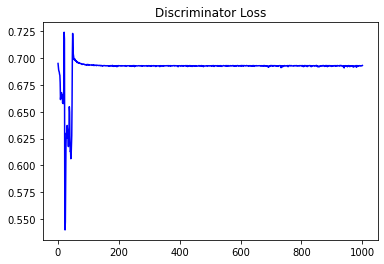

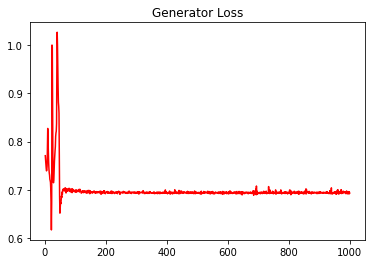

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.021018304751987


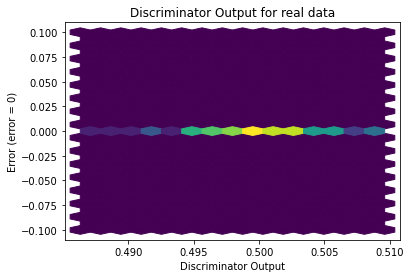

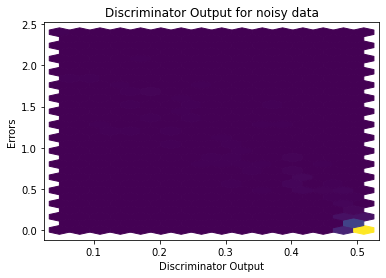

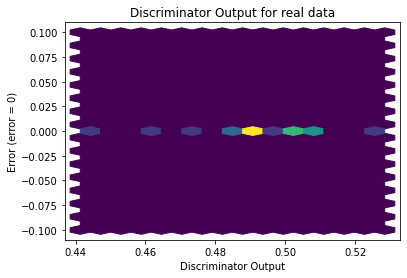

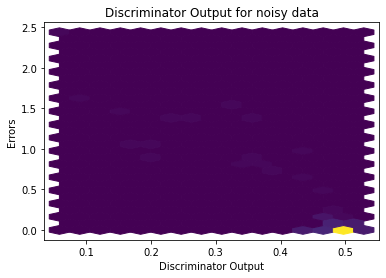

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


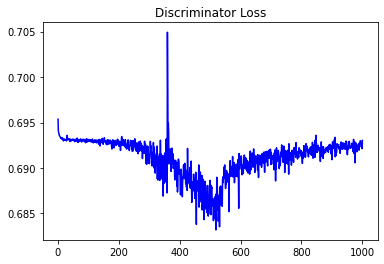

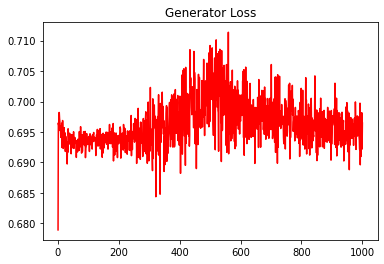

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.015292593968463145


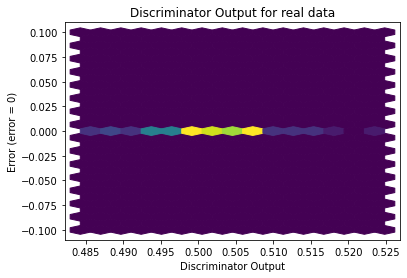

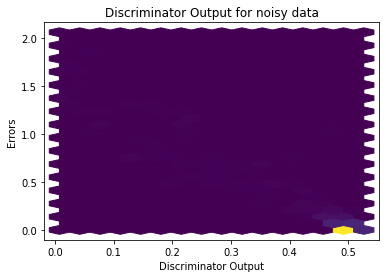

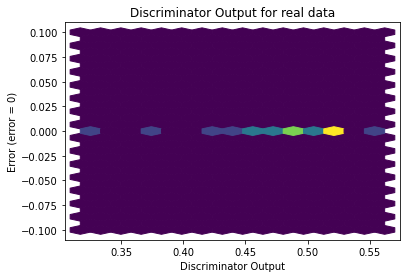

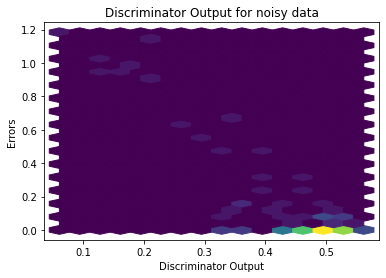

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0831]], requires_grad=True)
